### EDA_Accesos por rangos.ipynb

## Introducción

### Contexto General
Los datos analizados en este notebook provienen del **Ente Nacional de Comunicaciones (ENACOM)** de Argentina, el organismo 
regulador de las telecomunicaciones en el país. Esta información permite evaluar el estado y la evolución del acceso a 
internet en Argentina.

### Descripción del Conjunto de Datos
Este análisis se centra en la hoja de datos **"Datos de acceso por localidad sin rangos de velocidad."**, que proporciona 
información detallada sobre el estado de los accesos a internet en el país.

### Objetivo del Análisis
El propósito de este análisis es **explorar y visualizar los datos** para identificar tendencias, patrones y posibles 
anomalías en la información. Se aplicarán métodos de **Análisis Exploratorio de Datos (EDA)** para obtener insights 
valiosos.

In [137]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Accesos por rangos.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [138]:
# Extraer el nombre de las columnas
nombres_columnas = df.columns.tolist()
print("Nombres de las columnas:")
print(nombres_columnas)

Nombres de las columnas:
['Año', 'Trimestre', 'Provincia', 'Hasta 512 Kbps', 'De 512 Kbps a 1 Mbps', 'De 1 Mbps a 6 Mbps', 'De 6 Mbps a 10 Mbps', 'De 10 Mbps a 20 Mbps', 'De 20 Mbps a 30 Mbps', 'De 30 Mbps', 'Otros', 'Total']


In [139]:
# Verificar la carga
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   1000 non-null   int64  
 1   Trimestre             1000 non-null   int64  
 2   Provincia             1000 non-null   object 
 3   Hasta 512 Kbps        1000 non-null   int64  
 4   De 512 Kbps a 1 Mbps  1000 non-null   int64  
 5   De 1 Mbps a 6 Mbps    1000 non-null   int64  
 6   De 6 Mbps a 10 Mbps   1000 non-null   int64  
 7   De 10 Mbps a 20 Mbps  1000 non-null   int64  
 8   De 20 Mbps a 30 Mbps  1000 non-null   int64  
 9   De 30 Mbps            1000 non-null   int64  
 10  Otros                 994 non-null    float64
 11  Total                 1000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 93.9+ KB
None
    Año  Trimestre        Provincia  Hasta 512 Kbps  De 512 Kbps a 1 Mbps  \
0  2024          2     Buenos Aire

In [140]:
# Reemplazar 'SinDato' por NaN en las columnas especificadas
df.replace('Sin Dato', np.nan, inplace=True)

# Verificar y cambiar el tipo de dato de las columnas
conversiones = {
    
    'Velocidad': 'float64',
    'Accesos': 'int64'
}

for columna, tipo in conversiones.items():
    if columna in df.columns:
        try:
            df[columna] = df[columna].astype(tipo)
            print(f"La columna '{columna}' ha sido convertida a {tipo}.")
        except ValueError as e:
            print(f"No se pudo convertir la columna '{columna}' a {tipo} debido a un error: {e}")
    else:
        print(f"La columna '{columna}' no existe en el DataFrame.")

La columna 'Velocidad' no existe en el DataFrame.
La columna 'Accesos' no existe en el DataFrame.


In [141]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   1000 non-null   int64  
 1   Trimestre             1000 non-null   int64  
 2   Provincia             1000 non-null   object 
 3   Hasta 512 Kbps        1000 non-null   int64  
 4   De 512 Kbps a 1 Mbps  1000 non-null   int64  
 5   De 1 Mbps a 6 Mbps    1000 non-null   int64  
 6   De 6 Mbps a 10 Mbps   1000 non-null   int64  
 7   De 10 Mbps a 20 Mbps  1000 non-null   int64  
 8   De 20 Mbps a 30 Mbps  1000 non-null   int64  
 9   De 30 Mbps            1000 non-null   int64  
 10  Otros                 994 non-null    float64
 11  Total                 1000 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 93.9+ KB
None


In [142]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a tipo int64 si no lo es
    if not pd.api.types.is_integer_dtype(df['Trimestre']):
        try:
            # Intentar convertir a int64
            df['Trimestre'] = df['Trimestre'].astype('int64')
            print("La columna 'Trimestre' ha sido convertida a int64.")
        except ValueError as e:
            print(f"No se pudo convertir la columna 'Trimestre' a int64 debido a un error: {e}")
            # Manejar valores no convertibles, como NaN o strings
            df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').astype('Int64')
            print("Los valores no válidos han sido convertidos a NaN y el tipo de la columna es Int64.")
    else:
        print("La columna 'Trimestre' ya es de tipo int64.")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


La columna 'Trimestre' ya es de tipo int64.


In [143]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' esté en tipo entero
    df['Trimestre'] = df['Trimestre'].astype(int)

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels)
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")


Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [144]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Año                   1000 non-null   int64  
 1   Trimestre             1000 non-null   int64  
 2   Provincia             1000 non-null   object 
 3   Hasta 512 Kbps        1000 non-null   int64  
 4   De 512 Kbps a 1 Mbps  1000 non-null   int64  
 5   De 1 Mbps a 6 Mbps    1000 non-null   int64  
 6   De 6 Mbps a 10 Mbps   1000 non-null   int64  
 7   De 10 Mbps a 20 Mbps  1000 non-null   int64  
 8   De 20 Mbps a 30 Mbps  1000 non-null   int64  
 9   De 30 Mbps            1000 non-null   int64  
 10  Otros                 994 non-null    float64
 11  Total                 1000 non-null   int64  
 12  Trimestre_Label       1000 non-null   object 
dtypes: float64(1), int64(10), object(2)
memory usage: 101.7+ KB
None


Encontramos datos faltantes en Velocidad, por lo cual la diferencia encantidad de registros, sin embargo luego del análisis se determina la importancia de esto dentro del set de datos.

In [145]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [146]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'CABA',
        'CAPITAL FEDERAL': 'CABA',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario y dependiente del archivo
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CABA' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN']
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.


In [147]:
print(df.head())

    Año  Trimestre     Provincia  Hasta 512 Kbps  De 512 Kbps a 1 Mbps  \
0  2024          2  BUENOS AIRES           25287                 23034   
1  2024          2          CABA             518                  4122   
2  2024          2     CATAMARCA              72                   164   
3  2024          2         CHACO             236                   349   
4  2024          2        CHUBUT             125                  1139   

   De 1 Mbps a 6 Mbps  De 6 Mbps a 10 Mbps  De 10 Mbps a 20 Mbps  \
0              222627               221660                244528   
1               24539                40296                 33158   
2                2660                 3093                  3799   
3               14594                 8336                  6208   
4               43699                31971                 22696   

   De 20 Mbps a 30 Mbps  De 30 Mbps     Otros    Total Trimestre_Label  
0                106302     4020395  125547.0  4989380              Q2  


Al normalizar se unifican nombre de Provincias.

In [148]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Accesos por rangos.csv


In [149]:

# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Accesos por rangos.csv


In [150]:
import sweetviz as sv
from skimpy import skim

In [151]:
from skimpy import skim

# Resumen del DataFrame
skim(df)


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ int64       │ 10    │                                                          │
│ │ Number of columns │ 13     │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column                ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ Año                   │   0 │     0 │   2019 │  3.058 │  2014 │  2016 │   2019 │   2021 │    2024 │ ▇▇▃▇▇▆ │  │
│ │ Trimestre             │   0 │     0 │  2.464 │  1.114 │     1 │     1 │      2 │      3 │       4 │ ▇ ▇ ▇▇ │  │
│ │ Hasta 512 Kbps        │   0 │     0 │   1953 │  12680 │     6 │ 43.25 │    107 │  466.2 │  238900 │   ▇    │  │
│ │ De 512 Kbps a 1 Mbps  │   0 │     0 │   8864 │  20310 │     0 │ 389.8 │   2061 │   6852 │  171200 │   ▇    │  │
│ │ De 1 Mbps a 6 Mbps    │   0 │     0 │ 132800 │ 322300 │  1124 │ 23810 │  42130 │  83710 │ 2300000 │   ▇    │  │
│ │ De 6 Mbps a 10 Mbps   │   0 │     0 │  38410 │  64160 │     0 │  3877 │  13930 │  42590 │  403600 │   ▇▁   │  │
│ │ De 10 Mbps a 20 Mbps  │   0 │     0 │  37140 │  88290 │     0 │  2707 │  10500 │  26460 │  886700 │   ▇    │  │
│ │ De 20 Mbps a 30 Mbps  │   0 │     0 │  20090 │  69300 │     0 │ 43.75 │   1658 │  10110 │  949100 │   ▇    │  │
│ │ De 30 Mbps            │   0 │     0 │ 122200 │ 465700 │     0 │    15 │   4254 │  43400 │ 4068000 │   ▇    │  │
│ │ Otros                 │   6 │   0.6 │   6510 │  15340 │ -1945 │     0 │  346.5 │   6831 │  125500 │   ▇▁   │  │
│ │ Total                 │   0 │     0 │ 367900 │ 789900 │ 12410 │ 62340 │ 113600 │ 196900 │ 5045000 │   ▇▁   │  │
│ └───────────────────────┴─────┴───────┴────────┴────────┴───────┴───────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━┓  │
│ ┃            ┃    ┃      ┃          ┃            ┃           ┃         ┃ chars per  ┃ words per ┃ total      ┃  │
│ ┃ column     ┃ NA ┃ NA % ┃ shortest ┃ longest    ┃ min       ┃ max     ┃ row        ┃ row       ┃ words      ┃  │
│ ┡━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━┩  │
│ │ Provincia  │  0 │    0 │ CABA     │ SANTIAGO   │ BUENOS    │ TUCUMÁN │       8.45 │       1.5 │       1538 │  │
│ │            │    │      │          │ DEL ESTERO │ AIRES     │         │            │           │            │  │
│ │ Trimestre_ │  0 │    0 │ Q2       │ Q2         │ Q1        │ Q4      │          2 │         1 │       1000 │  │
│ │ Label      │    │      │          │            │           │         │            │           │            │  │
│ └────────────┴────┴──────┴──────────┴────────────┴────


Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
                Año    Trimestre     Provincia  Hasta 512 Kbps  \
count   1000.000000  1000.000000          1000     1000.000000   
unique          NaN          NaN            24             NaN   
top             NaN          NaN  BUENOS AIRES             NaN   
freq            NaN          NaN            42             NaN   
mean    2018.824000     2.464000           NaN     1953.315000   
std        3.058493     1.114426           NaN    12676.574971   
min     2014.000000     1.000000           NaN        6.000000   
25%     2016.000000     1.000000           NaN       43.250000   
50%     2019.000000     2.000000           NaN      107.000000   
75%     2021.000000     3.000000           NaN      466.250000   
max     2024.000000     4.000000           NaN   238920.000000   

        De 512 Kbps a 1 Mbps  De 1 Mbps a 6 Mbps  De 6 Mbps a 10 Mbps  \
count            1000.000000        1.000000e+03          10

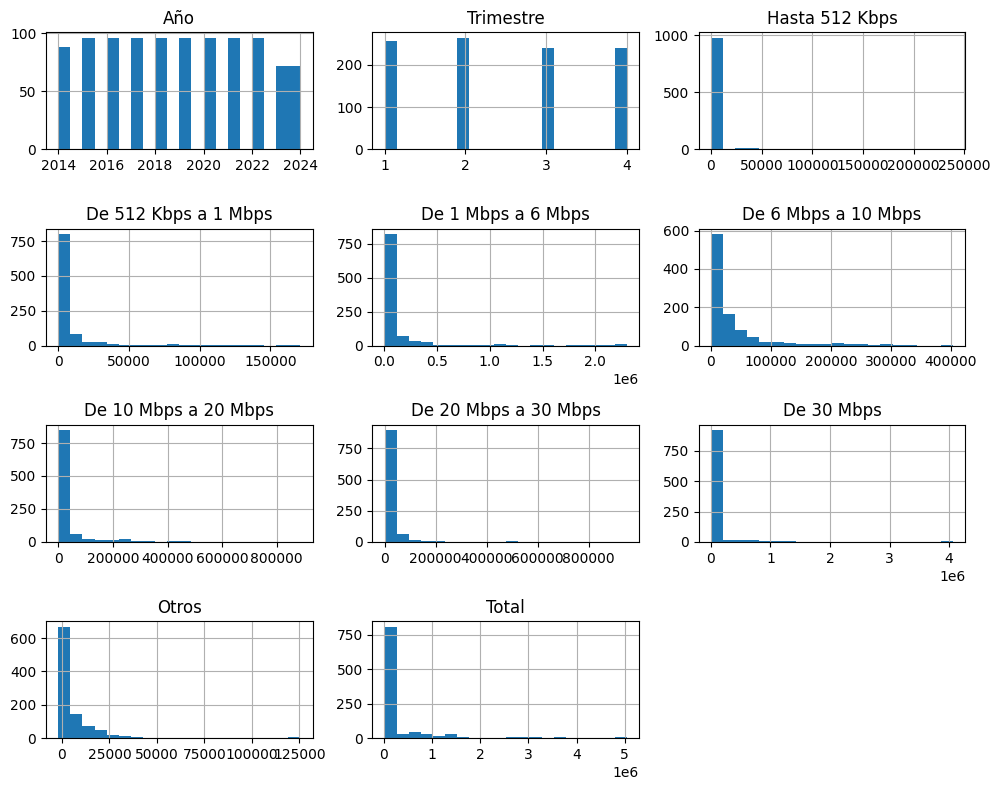

In [152]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

A partir de La estadística descriptiva observamos una amplia presencia de la provincia de Buenos Aires, en los histogramas se observa velocidades menore a 2000 bps, con pocos accesos.


Matriz de correlación entre columnas numéricas:
                           Año  Trimestre  Hasta 512 Kbps  \
Año                   1.000000  -0.079393       -0.001343   
Trimestre            -0.079393   1.000000       -0.001507   
Hasta 512 Kbps       -0.001343  -0.001507        1.000000   
De 512 Kbps a 1 Mbps -0.330976  -0.026326        0.257982   
De 1 Mbps a 6 Mbps   -0.198674  -0.003507        0.381097   
De 6 Mbps a 10 Mbps   0.104317   0.010679        0.356521   
De 10 Mbps a 20 Mbps  0.018461   0.002718        0.395033   
De 20 Mbps a 30 Mbps  0.075515   0.022964        0.590415   
De 30 Mbps            0.262288  -0.003537        0.378835   
Otros                 0.317228  -0.009354        0.219595   
Total                 0.088366  -0.001192        0.530679   

                      De 512 Kbps a 1 Mbps  De 1 Mbps a 6 Mbps  \
Año                              -0.330976           -0.198674   
Trimestre                        -0.026326           -0.003507   
Hasta 512 Kbps      

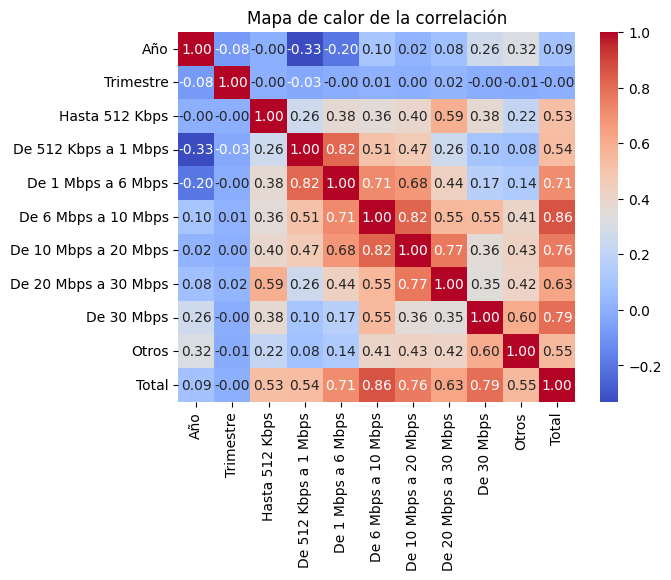

In [153]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


No se observa clara correlación entre los datos numéricos, la unoca correlación positiva esta entre año y velocidad, pero es muy pequeña.

In [154]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         11  11  10  10
CABA                 11  11  10  10
CATAMARCA            11  11  10  10
CHACO                11  11  10  10
CHUBUT               11  11  10  10
CORRIENTES           11  11  10  10
CÓRDOBA              11  11  10  10
ENTRE RÍOS           11  11  10  10
FORMOSA              11  11  10  10
JUJUY                11  11  10  10
LA PAMPA             11  11  10  10
LA RIOJA             11  11  10  10
MENDOZA              11  11  10  10
MISIONES             11  11  10  10
NEUQUÉN              11  11  10  10
RÍO NEGRO            11  11  10  10
SALTA                10  11  10  10
SAN JUAN             10  11  10  10
SAN LUIS             10  11  10  10
SANTA CRUZ           10  11  10  10
SANTA FE             10  11  10  10
SANTIAGO DEL ESTERO  10  11  10  10
TIERRA DEL FUEGO     10  11  10  10
TUCUMÁN              10  11  10  10
Tabla d

La tabla de contingencia tiene como objetivo resumir la relación entre dos variables categóricas (en este caso, Provincia y Partido), La tabla nos muestra frecuencia no uniformes o nulas en algunos casos, la distribución de los datos se reflejan más en algunas provincias   La Concentración de datos se centra en Provincias como BUENOS AIRES y CHACO tienen mayor representación en comparación con otras como CATAMARCA o JUJUY.

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4
Provincia                          
BUENOS AIRES         11  11  10  10
CABA                 11  11  10  10
CATAMARCA            11  11  10  10
CHACO                11  11  10  10
CHUBUT               11  11  10  10
CORRIENTES           11  11  10  10
CÓRDOBA              11  11  10  10
ENTRE RÍOS           11  11  10  10
FORMOSA              11  11  10  10
JUJUY                11  11  10  10
LA PAMPA             11  11  10  10
LA RIOJA             11  11  10  10
MENDOZA              11  11  10  10
MISIONES             11  11  10  10
NEUQUÉN              11  11  10  10
RÍO NEGRO            11  11  10  10
SALTA                10  11  10  10
SAN JUAN             10  11  10  10
SAN LUIS             10  11  10  10
SANTA CRUZ           10  11  10  10
SANTA FE             10  11  10  10
SANTIAGO DEL ESTERO  10  11  10  10
TIERRA DEL FUEGO     10  11  10  10
TUCUMÁN              10  11  10  10


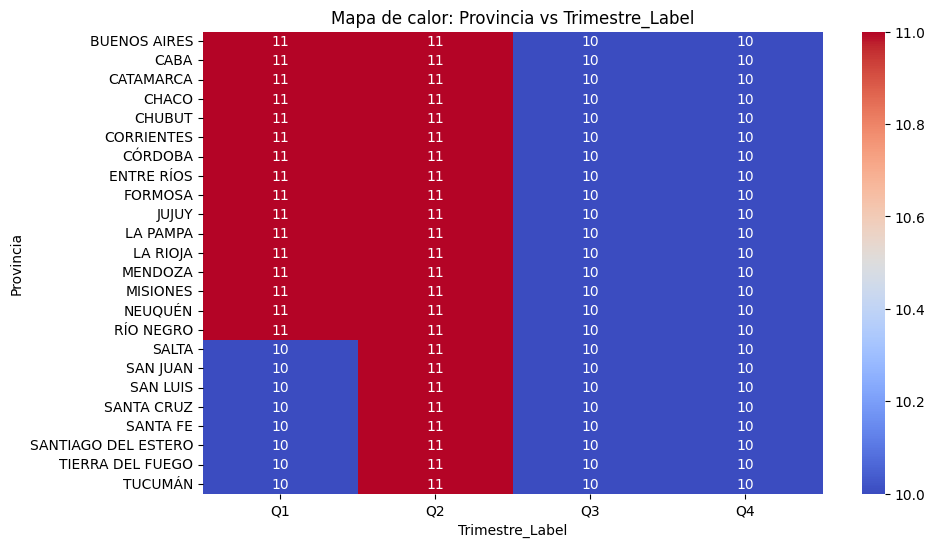

Tabla de contingencia entre Trimestre_Label y Provincia:
Provincia        BUENOS AIRES  CABA  CATAMARCA  CHACO  CHUBUT  CORRIENTES  \
Trimestre_Label                                                             
Q1                         11    11         11     11      11          11   
Q2                         11    11         11     11      11          11   
Q3                         10    10         10     10      10          10   
Q4                         10    10         10     10      10          10   

Provincia        CÓRDOBA  ENTRE RÍOS  FORMOSA  JUJUY  ...  NEUQUÉN  RÍO NEGRO  \
Trimestre_Label                                       ...                       
Q1                    11          11       11     11  ...       11         11   
Q2                    11          11       11     11  ...       11         11   
Q3                    10          10       10     10  ...       10         10   
Q4                    10          10       10     10  ...       10         

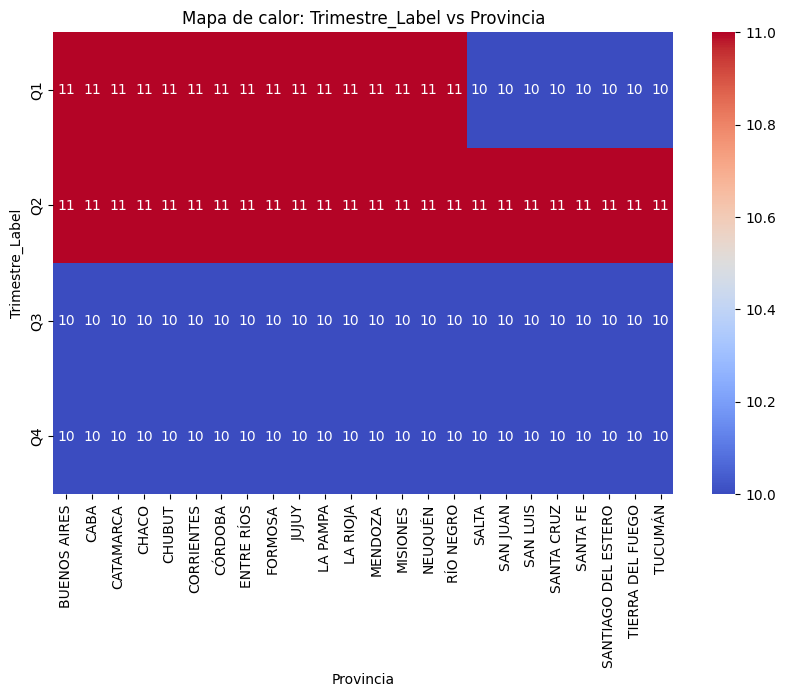

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


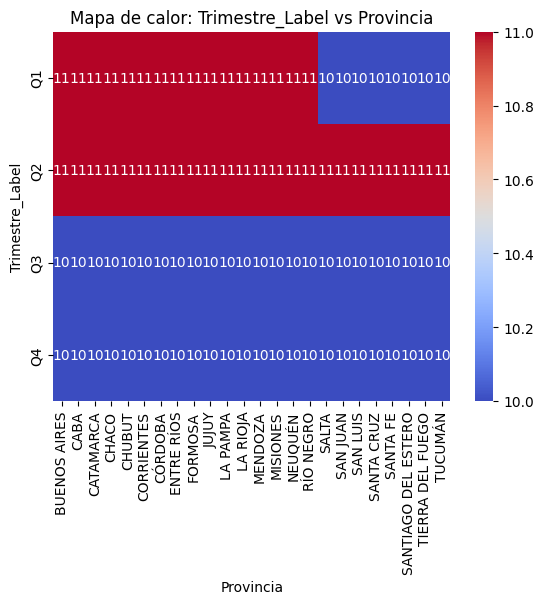

In [156]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


In [157]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
          Año  Trimestre  Hasta 512 Kbps  De 512 Kbps a 1 Mbps  \
0    1.693184  -0.416566        1.841614              0.697938   
1    1.693184  -0.416566       -0.113282             -0.233582   
2    1.693184  -0.416566       -0.148483             -0.428535   
3    1.693184  -0.416566       -0.135539             -0.419422   
4    1.693184  -0.416566       -0.144300             -0.380511   
..        ...        ...             ...                   ...   
995 -1.578037  -1.314338       -0.153376             -0.184868   
996 -1.578037  -1.314338       -0.151403             -0.436317   
997 -1.578037  -1.314338       -0.111151              0.275621   
998 -1.578037  -1.314338        0.172032             -0.387997   
999 -1.578037  -1.314338        0.214415             -0.209151   

     De 1 Mbps a 6 Mbps  De 6 Mbps a 10 Mbps  De 10 Mbps a 20 Mbps  \
0              0.278968             2.857756              2.350116   
1             -0.336029       

Columna Trimestre:
Tiene valores z-score, lo que significa que los datos están normalizados respecto a la media.
Un valor negativo indica que el trimestre está por debajo del promedio, mientras que un valor positivo está por encima.

Columna Velocidad:
Todos los valores son NaN, lo que sugiere que no se calculó el z-score para esta columna. Esto podría deberse a que:
La columna tiene valores nulos.
La desviación estándar es cero (todos los valores son iguales).
No se incluyó en el cálculo por un error en la selección.

Columna Accesos:
Contiene valores z-score que indican la dispersión respecto al promedio de accesos.
La mayoría de los valores están cercanos a 0, indicando una dispersión moderada. Valores más extremos serían potencialmente atípicos.

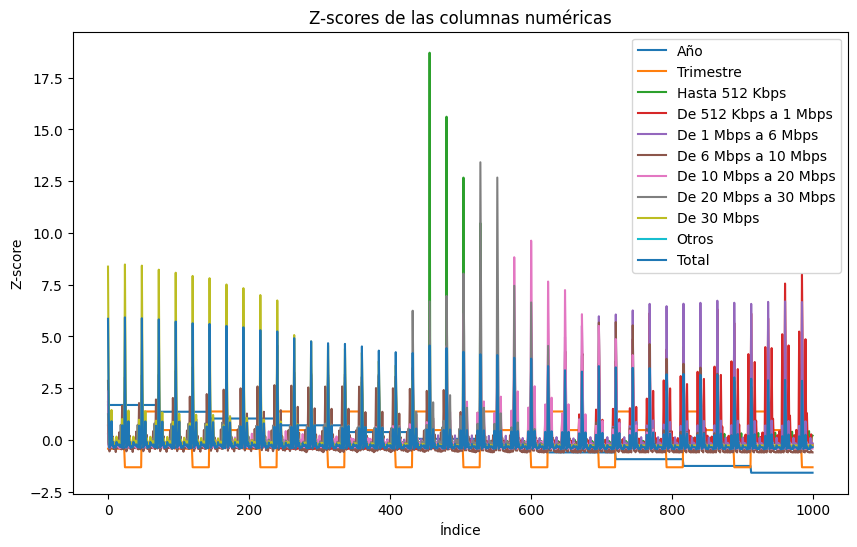

In [158]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [159]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           42
CABA                   42
CATAMARCA              42
CHACO                  42
CHUBUT                 42
CÓRDOBA                42
CORRIENTES             42
ENTRE RÍOS             42
FORMOSA                42
JUJUY                  42
LA PAMPA               42
LA RIOJA               42
MENDOZA                42
MISIONES               42
NEUQUÉN                42
RÍO NEGRO              42
SALTA                  41
SAN JUAN               41
SAN LUIS               41
SANTA CRUZ             41
SANTA FE               41
SANTIAGO DEL ESTERO    41
TIERRA DEL FUEGO       41
TUCUMÁN                41
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Trimestre_Label
Q2    264
Q1    256
Q4    240
Q3    240
Name: count, dtype: int64


In [160]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index(['Otros'], dtype='object')


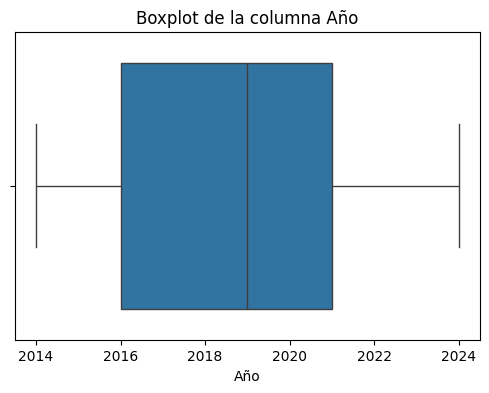

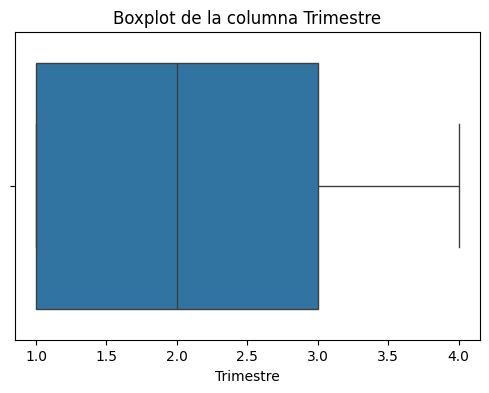

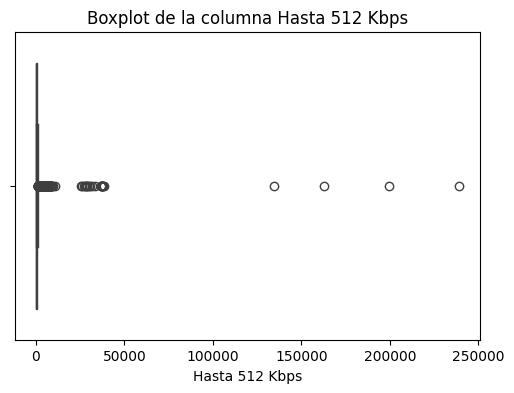

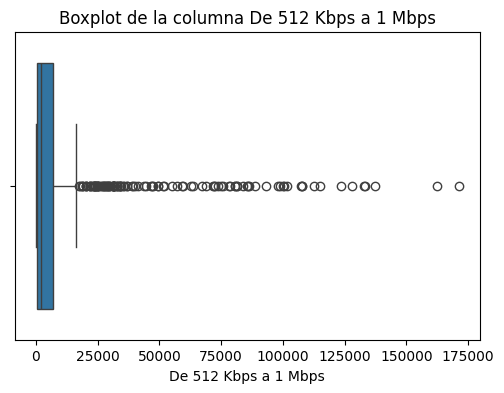

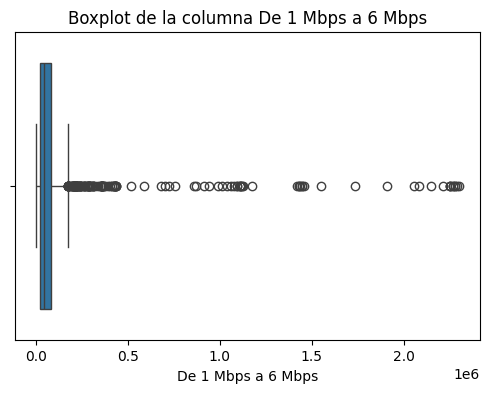

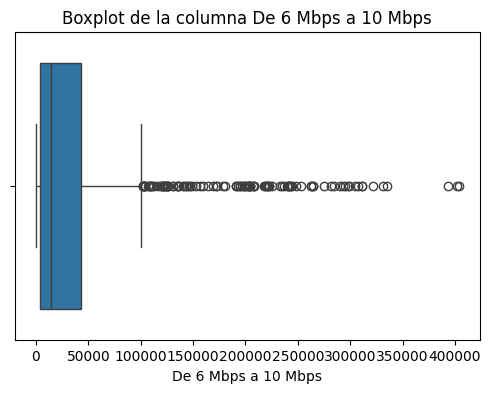

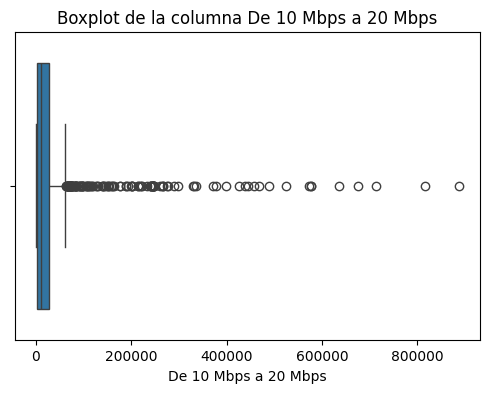

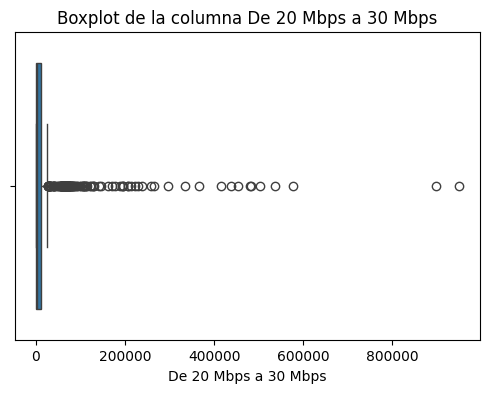

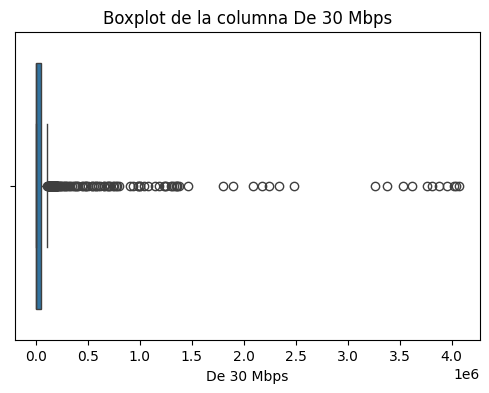

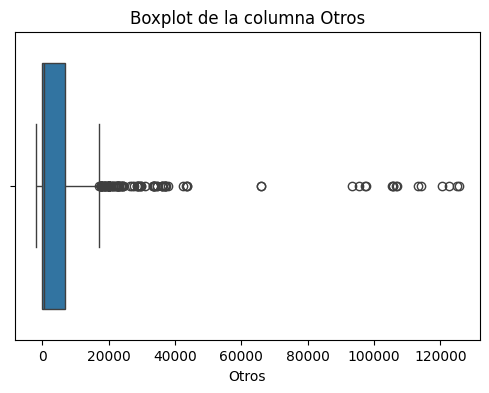

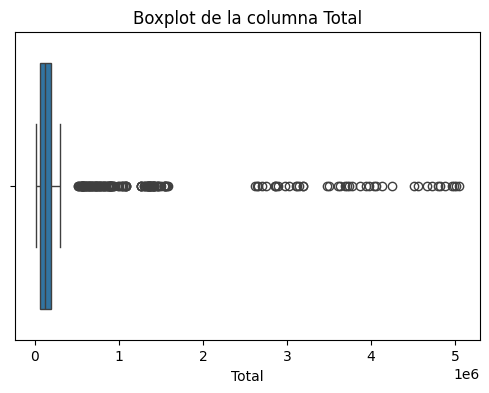

In [161]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [162]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                     0
Trimestre               0
Provincia               0
Hasta 512 Kbps          0
De 512 Kbps a 1 Mbps    0
De 1 Mbps a 6 Mbps      0
De 6 Mbps a 10 Mbps     0
De 10 Mbps a 20 Mbps    0
De 20 Mbps a 30 Mbps    0
De 30 Mbps              0
Otros                   6
Total                   0
Trimestre_Label         0
dtype: int64


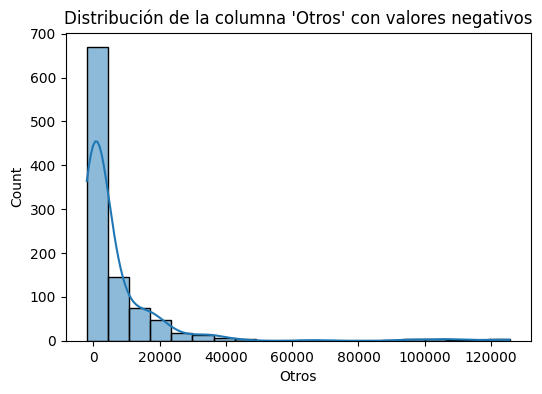

In [163]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [164]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")


Valores negativos en la columna 'Otros': 2


In [165]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PI_21\PI_2_DA_corregido\data_internet_ind\Accesos por rangos.csv


In [166]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Año                      0.049208
Trimestre                0.055832
Hasta 512 Kbps          13.835874
De 512 Kbps a 1 Mbps     4.155814
De 1 Mbps a 6 Mbps       4.881266
De 6 Mbps a 10 Mbps      2.757707
De 10 Mbps a 20 Mbps     4.956440
De 20 Mbps a 30 Mbps     7.631490
De 30 Mbps               6.213321
Otros                    5.004958
Total                    3.880623
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Año                      -1.155330
Trimestre                -1.348124
Hasta 512 Kbps          218.416043
De 512 Kbps a 1 Mbps     19.680699
De 1 Mbps a 6 Mbps       25.635110
De 6 Mbps a 10 Mbps       7.978699
De 10 Mbps a 20 Mbps     30.424887
De 20 Mbps a 30 Mbps     75.327413
De 30 Mbps               42.753053
Otros                    30.170830
Total                    15.869645
dtype: float64


Velocidad (14.304939):
Alta asimetría positiva, indicando que hay valores extremos altos (outliers) hacia la derecha.
Accesos (11.228155):
También muestra una alta asimetría positiva, sugiriendo valores extremos altos en los datos.

In [167]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
                Variable           VIF
0                  const  6.152279e+05
1                    Año  1.410054e+00
2              Trimestre  1.018154e+00
3         Hasta 512 Kbps  6.447266e+02
4   De 512 Kbps a 1 Mbps  1.653113e+03
5     De 1 Mbps a 6 Mbps  4.133240e+05
6    De 6 Mbps a 10 Mbps  1.640300e+04
7   De 10 Mbps a 20 Mbps  3.105294e+04
8   De 20 Mbps a 30 Mbps  1.909518e+04
9             De 30 Mbps  8.635668e+05
10                 Otros  9.342588e+02
11                 Total  2.484216e+06


Velocidad (Skewness: 14.304939):
La alta asimetría positiva implica que la mayoría de los valores de la variable Velocidad están concentrados en un rango bajo o moderado, mientras que hay un número reducido de observaciones con valores muy altos que alargan la cola derecha de la distribución. Esto suele suceder en datos donde pocos casos destacan considerablemente, como conexiones de internet con velocidades excepcionalmente altas.

Accesos (Skewness: 11.228155):
Similar a Velocidad, la asimetría positiva sugiere que la mayoría de los datos están agrupados en un rango bajo o medio, mientras que un pequeño número de observaciones tiene valores extremadamente altos, generando una cola hacia la derecha. Esto podría reflejar localidades o regiones con un número inusualmente alto de accesos en comparación con otras.

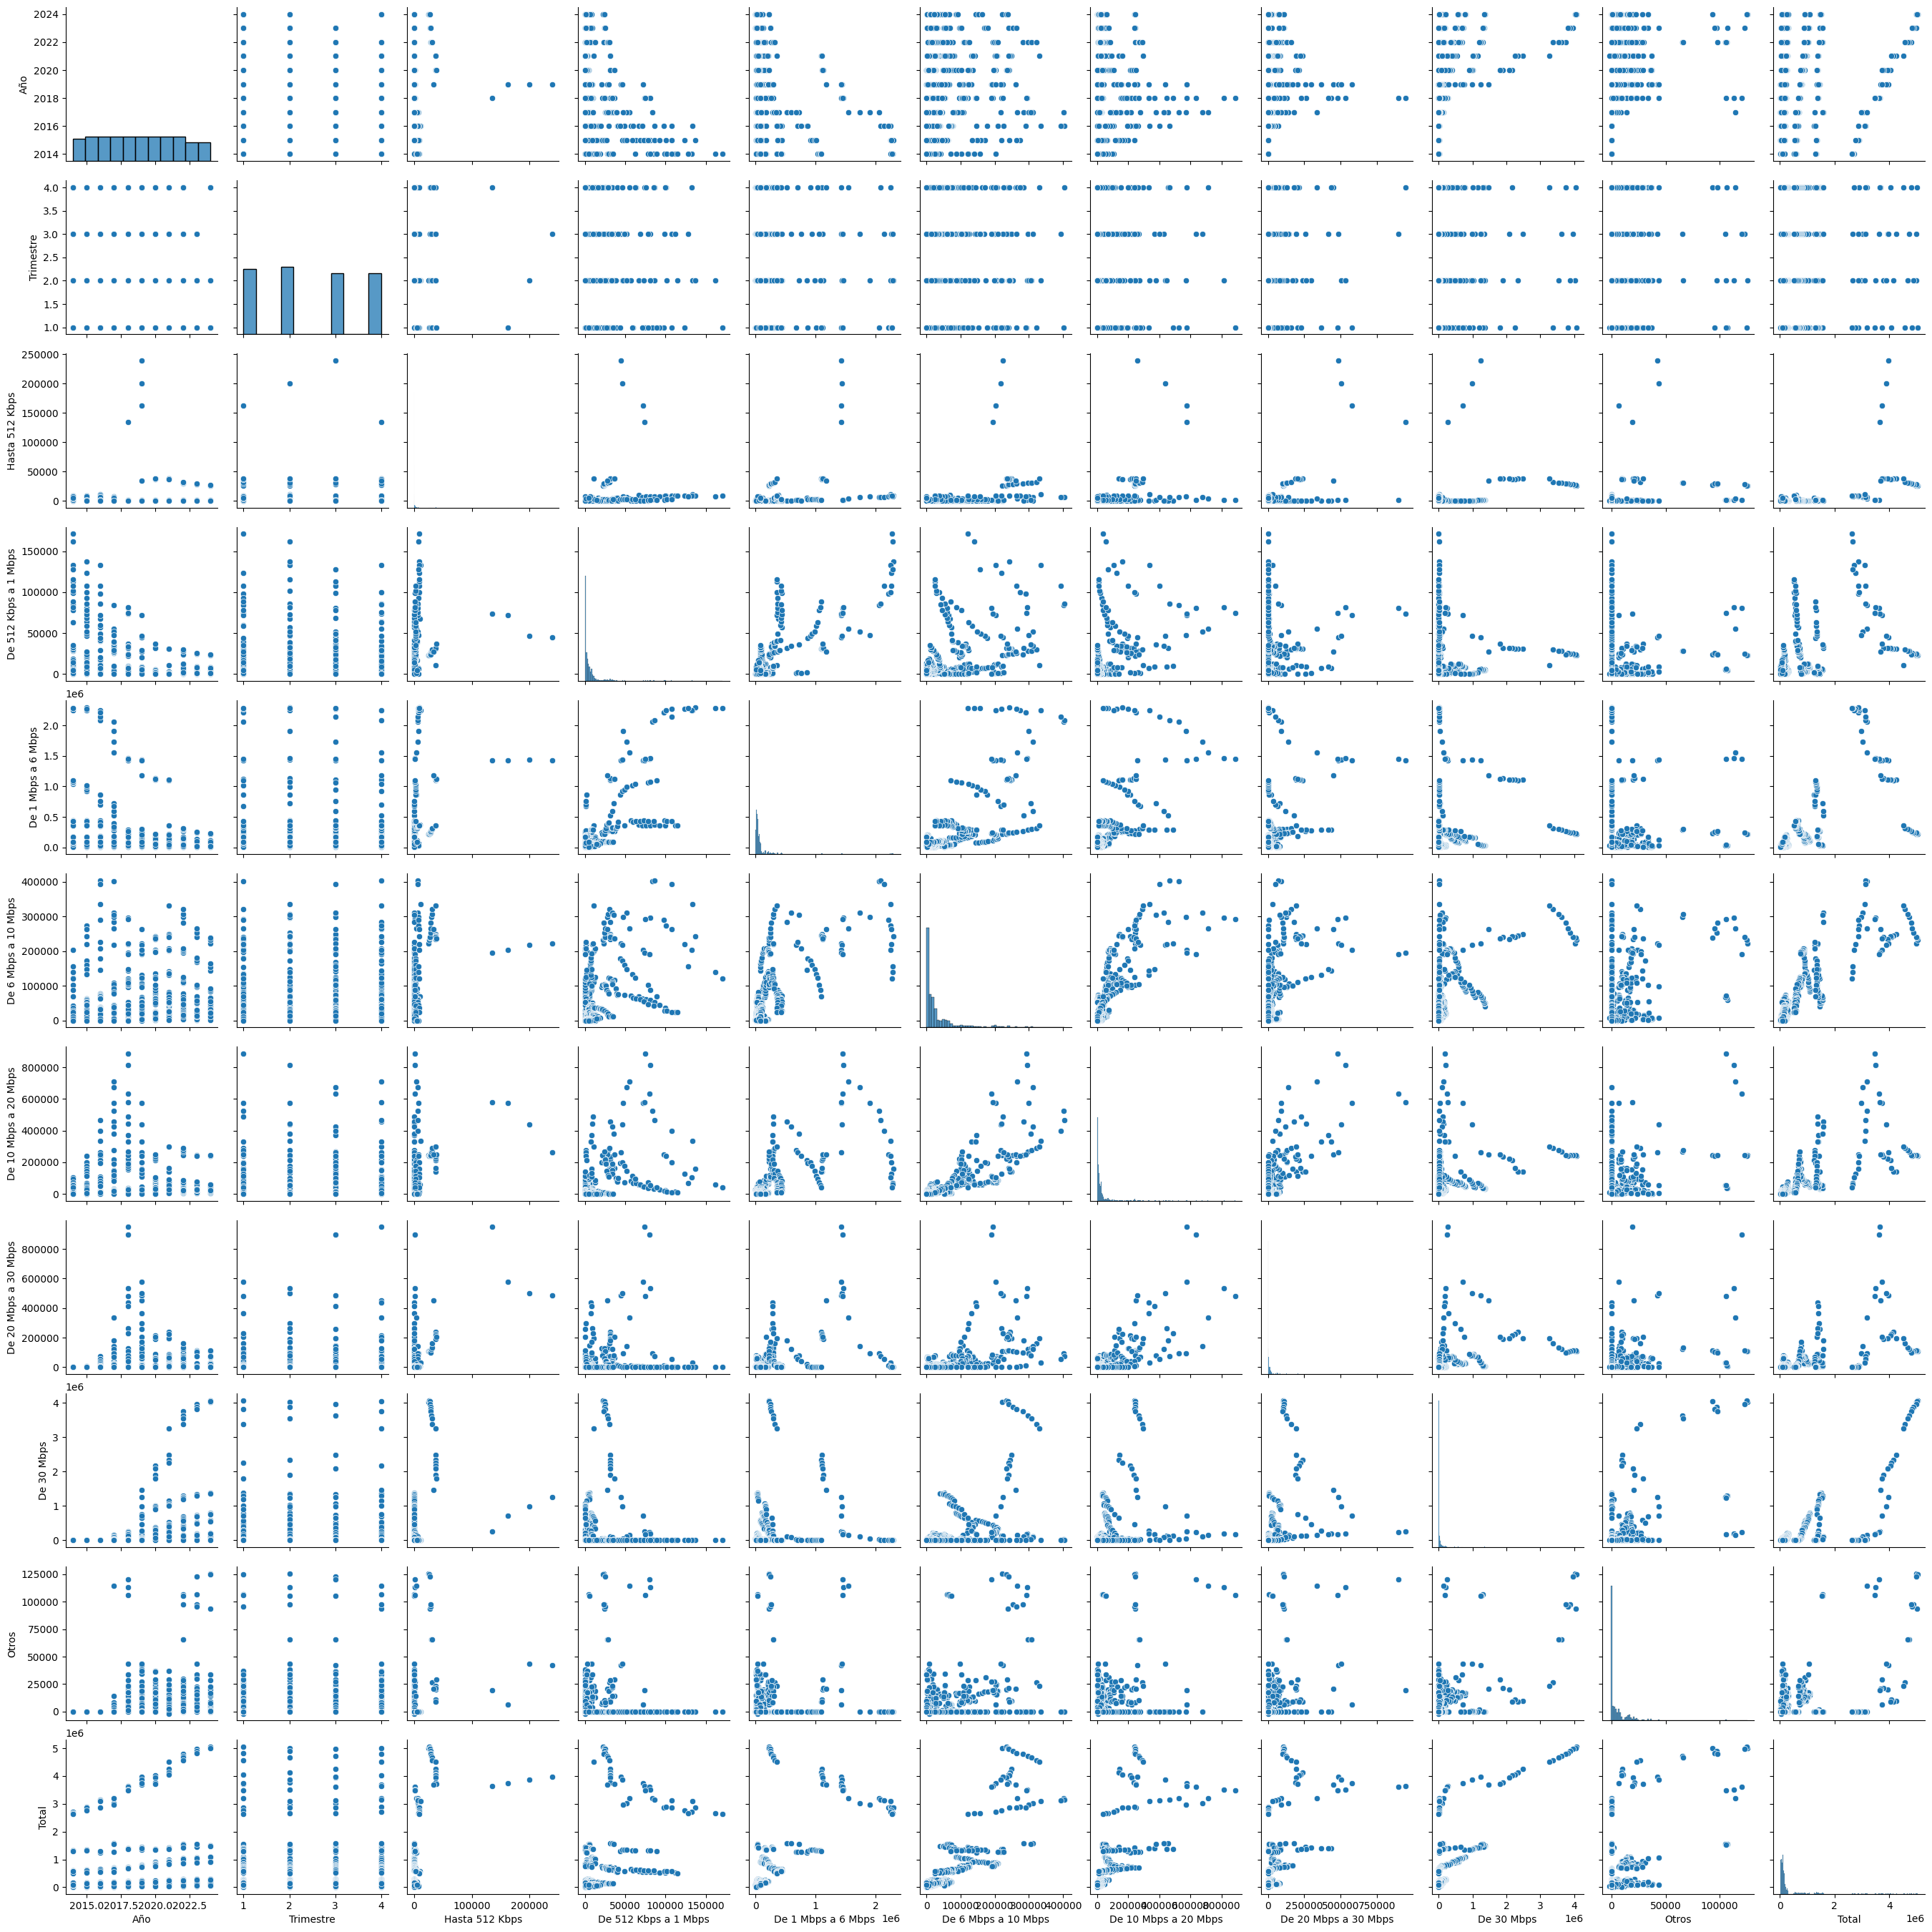

In [168]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

Mayores accesos en los trimestres 1 y 4; mayores accesos a menores velocidades

In [169]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Provincia':
                      Año                                                 \
                    count         mean       std     min     25%     50%   
Provincia                                                                  
BUENOS AIRES         42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
CABA                 42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
CATAMARCA            42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
CHACO                42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
CHUBUT               42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
CORRIENTES           42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
CÓRDOBA              42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
ENTRE RÍOS           42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
FORMOSA              42.0  2018.785714  3.112020  2014.0  2016.0  2019.0   
JUJUY                42.0  2018.785714  3.112020

In [170]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0



Estadísticas por grupo de 'Provincia':
                             Año  Trimestre  Hasta 512 Kbps  \
Provincia                                                     
BUENOS AIRES         2018.785714   2.452381    35109.904762   
CABA                 2018.785714   2.452381      775.476190   
CATAMARCA            2018.785714   2.452381       44.476190   
CHACO                2018.785714   2.452381      243.238095   
CHUBUT               2018.785714   2.452381      513.500000   
CORRIENTES           2018.785714   2.452381       42.000000   
CÓRDOBA              2018.785714   2.452381      277.904762   
ENTRE RÍOS           2018.785714   2.452381      947.380952   
FORMOSA              2018.785714   2.452381      952.785714   
JUJUY                2018.785714   2.452381      594.309524   
LA PAMPA             2018.785714   2.452381     1153.095238   
LA RIOJA             2018.785714   2.452381       13.785714   
MENDOZA              2018.785714   2.452381      117.857143   
MISIONES       

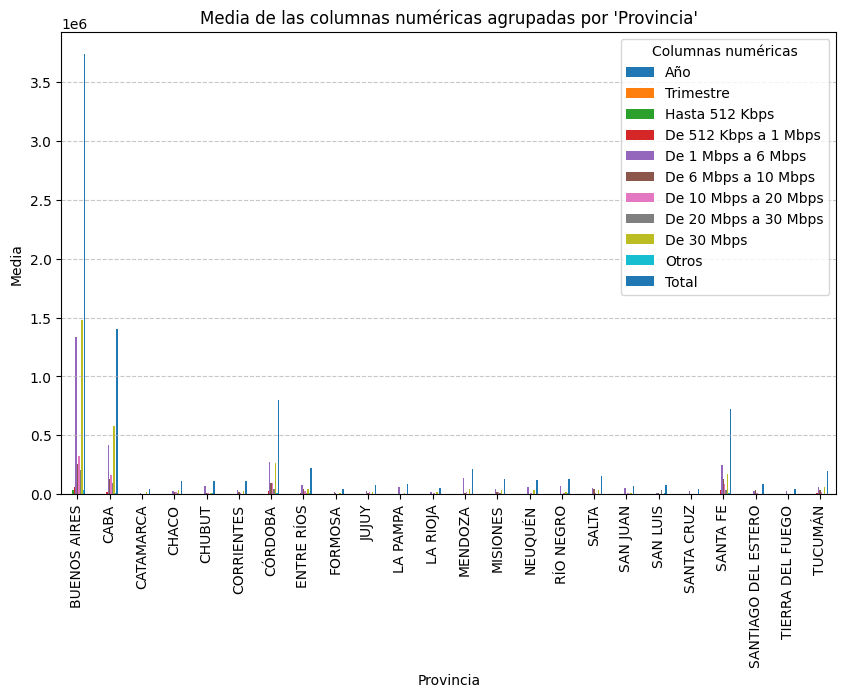


Estadísticas por grupo de 'Trimestre_Label':
                        Año  Trimestre  Hasta 512 Kbps  De 512 Kbps a 1 Mbps  \
Trimestre_Label                                                                
Q1               2019.15625        1.0     1896.519531           9426.242188   
Q2               2019.00000        2.0     2010.522727           9150.212121   
Q3               2018.50000        3.0     2097.804167           8917.370833   
Q4               2018.60000        4.0     1806.479167           7897.104167   

                 De 1 Mbps a 6 Mbps  De 6 Mbps a 10 Mbps  \
Trimestre_Label                                            
Q1                    133678.031250         38015.718750   
Q2                    131452.450758         37481.075758   
Q3                    138021.450000         38527.466667   
Q4                    128009.795833         39728.670833   

                 De 10 Mbps a 20 Mbps  De 20 Mbps a 30 Mbps     De 30 Mbps  \
Trimestre_Label                   

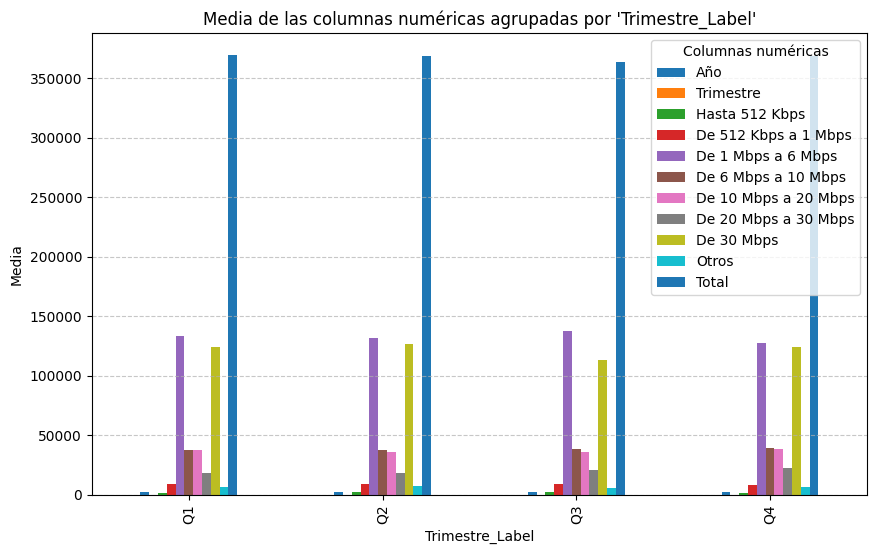

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


# Análisis y Limpieza de Datos con Pandas y Seaborn
Este Jupyter Notebook realiza un análisis y limpieza de datos utilizando las bibliotecas pandas, numpy, matplotlib y seaborn. Su objetivo es transformar un archivo CSV en un conjunto de datos limpio, consistente y listo para su análisis posterior.

# Contenido
Carga del archivo y normalización de nombres de columnas

Carga de un archivo CSV con verificación de existencia.
Normalización de los nombres de las columnas para mantener consistencia.
Verificación y conversión de tipos de datos

Identificación y conversión de columnas al tipo adecuado (por ejemplo, convertir Trimestre a int64).
Creación de etiquetas descriptivas

Generación de una nueva columna (Trimestre_Label) para mejorar la legibilidad de los datos.
Información básica del DataFrame

Presentación de detalles básicos del DataFrame (info(), tipos de datos, valores no nulos).
Reemplazo de variaciones específicas y normalización de nombres

Estandarización de valores en columnas categóricas como Provincia, Partido y Localidad.
Análisis descriptivo y exploración inicial

Cálculo de estadísticas descriptivas.
Visualización de distribuciones con histogramas.
Análisis de correlación

Cálculo y visualización de la matriz de correlación con mapas de calor para identificar relaciones entre variables numéricas.
Tablas de contingencia

Creación de tablas de contingencia para el análisis de relaciones entre categorías.
Detección y manejo de valores atípicos

Cálculo de Z-scores para identificar valores atípicos en columnas numéricas.
Conteo de categorías

Conteo y análisis de las categorías presentes en columnas categóricas.
Manejo de valores negativos

Identificación y tratamiento de valores negativos en las columnas numéricas (reemplazo por NaN).
Análisis de distribuciones

Evaluación de la asimetría (skewness) y curtosis (kurtosis) para entender la forma de las distribuciones.
Revisión de multicolinealidad

Cálculo del Factor de Inflación de la Varianza (VIF) para identificar multicolinealidad entre variables numéricas.
Visualización de relaciones entre variables

Uso de gráficos de dispersión múltiple (pairplot) para identificar patrones entre variables numéricas.
Agrupación y resumen de datos

Agrupación por categorías y generación de estadísticas agregadas para cada grupo.
Verificación de duplicados

Identificación y manejo de filas duplicadas.
Guardado de datos limpios

Guardado del DataFrame procesado en el archivo original o uno nuevo.
# Requisitos
Python 3.x

# Bibliotecas: 
pandas, numpy, matplotlib, seaborn, scipy, statsmodels

# Instalación de las bibliotecas:

bash

pip install pandas numpy matplotlib seaborn scipy statsmodels  

# Uso
Coloca el archivo CSV en la misma carpeta que el notebook.
Abre el notebook en Jupyter y ejecuta las celdas en orden.
Verifica los resultados y guarda el archivo procesado.

# Conclusiones
Este notebook es una herramienta integral para la limpieza y análisis de datos. Aborda problemas comunes como:

Datos inconsistentes: Nombres de columnas y valores estandarizados.
Datos faltantes: Manejo de valores nulos.
Valores atípicos: Identificación y análisis de outliers.
Relaciones entre variables: Visualización de correlaciones y patrones.
Problemas estructurales: Detección de duplicados y valores negativos.
Con este flujo de trabajo, los datos estarán listos para análisis más avanzados o modelado.

# Autor
Elaborado por: Harry Guevara